# Life expectancy and GDP data for a set of countries

This is an analysis for a set of coountries to explore the relationship between GDP and life expectancy, from the years 2000 to 2014.
I will explore potential relationships between parameters, such as:
**Is GDP the main driving factor for life ecpectancy?**
**How does the GDP and life expectancy for each country vary through the years? Is the relationship linear?**

This project will use the dataset `all_data.csv` to draw the necessary conclusions

Import statements for the relevant modules:

In [59]:
import math as Math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

**Creating and intially viewing the data frame**

In [61]:
gdp_life = pd.read_csv('all_data.csv')
gdp_life.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [62]:
gdp_life.info()
gdp_life = gdp_life.rename(columns = {'Life expectancy at birth (years)': 'Life_expectancy'})
gdp_life.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


Index(['Country', 'Year', 'Life_expectancy', 'GDP'], dtype='object')

The column `Life expectancy at birth (years)` has been renamed to `Life_expectancy`, this is for ease of use in later analysis.

The columns are listed along with their data types, of which all look appropriate so none will need to be changed.

There are the same ammount on non-null values for each column meaning no data is missing.

**Initial Impressions**

Naturally, the assumption can be made that life expectancy and GDP are positively correlated, as a higher GDP usually means a better quality of life and better healthcare.

Also, as the years increase it should be seen that both `GDP` and `Life expectancy at birth` both increase, as technology develops and humanity evolves.

**Initial analysis of the distribution for life expectancy & GDP**

- Using boxplots to see the full distribution of each variable for the entire time period, this does not indicate the direction of the change.
- Countries are on the x-axis
- Variable in question is on the y-axis

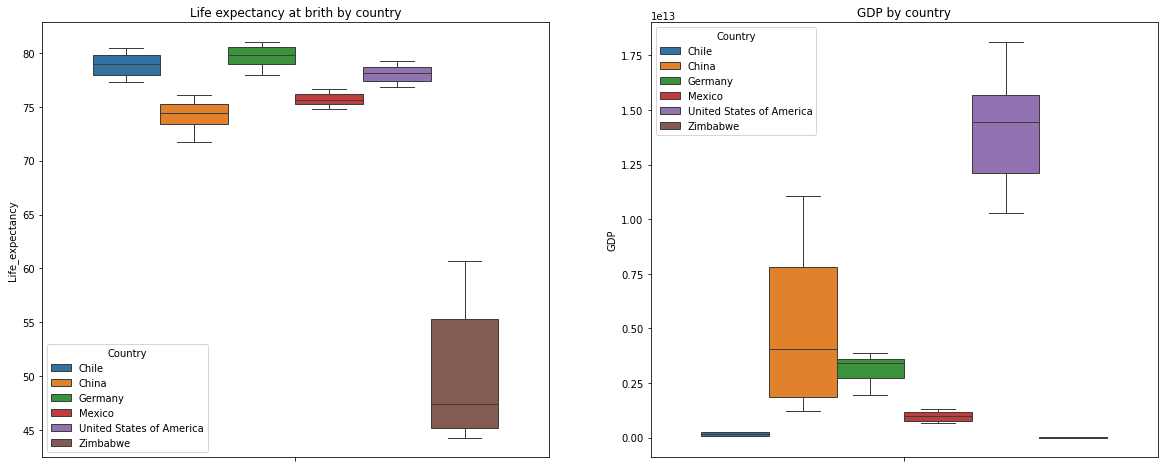

<Figure size 432x288 with 0 Axes>

In [131]:
plt.figure(figsize = (20, 8))
plt.subplot(1, 2, 1)
sns.boxplot(hue = gdp_life.Country, y = gdp_life['Life_expectancy'])
plt.xticks(rotation = 30)
plt.title('Life expectancy at brith by country')
plt.subplot(1, 2, 2)
sns.boxplot(hue = 'Country', y = 'GDP', data = gdp_life)
plt.title('GDP by country')
plt.xticks(rotation = 30)
plt.show()
plt.clf()

From this we can see that for all of the "More developed" countries, the life expectancy see less variety. They are all set around the same age range, besides `Zimbabwe`. 

The GDP however is a very different story, as the `United States of America` is a clear front runner, with `Chile` having the lowest GDP. 
This suggests that the `GDP` and `Life expectancy at birth` have no correlation, or less correlation than initially assumed.

This could be down to a multidue of factors, which cannot be analysed using this dataset due to the lack of data.

**GDP and Life Expectancy by country**

To gain a greater understanding of the distribution of both `GDP` and `Life Expectancy` over the timeframe accessible. 

*See the boxplots below*

Chile


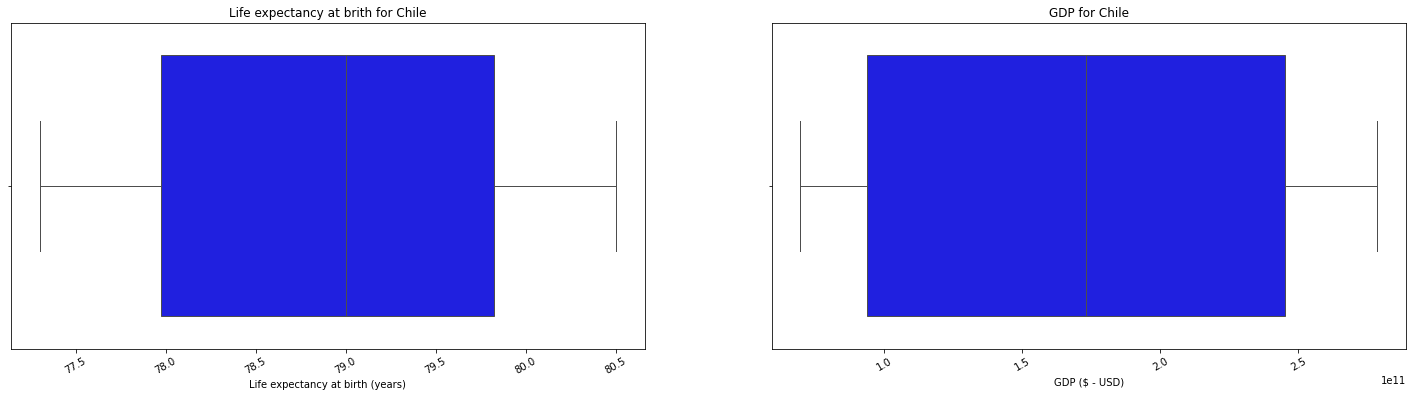

China


<Figure size 432x288 with 0 Axes>

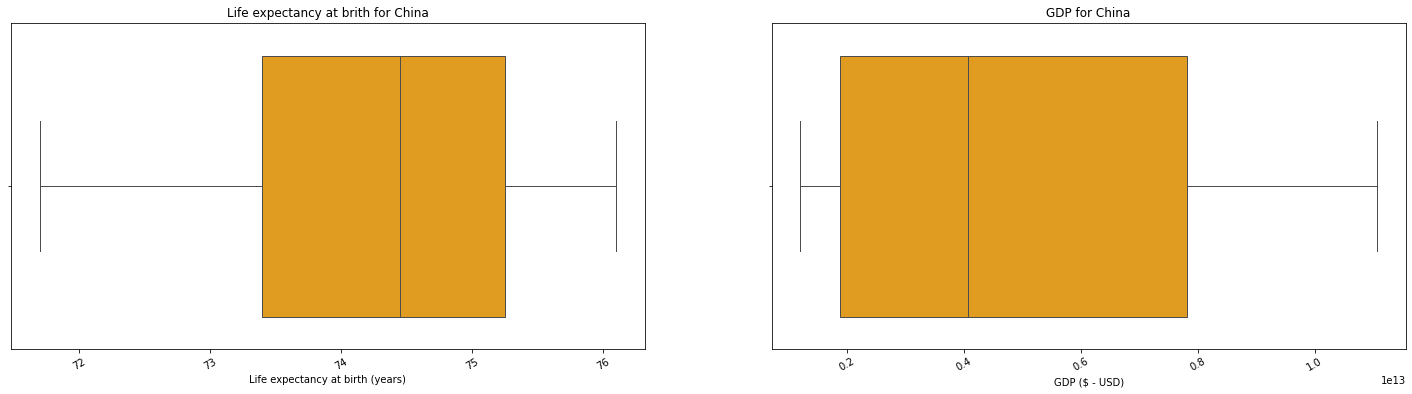

Germany


<Figure size 432x288 with 0 Axes>

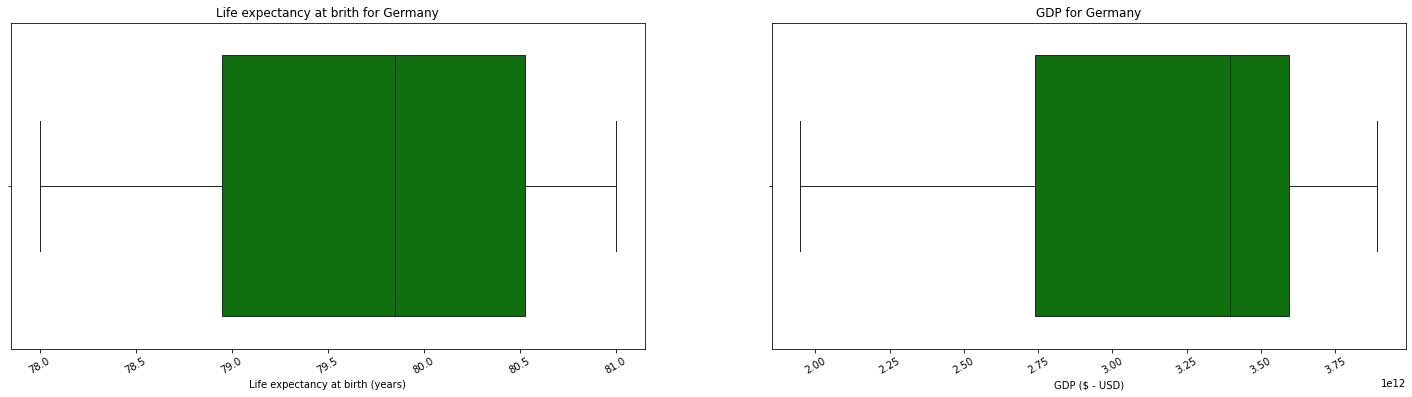

Mexico


<Figure size 432x288 with 0 Axes>

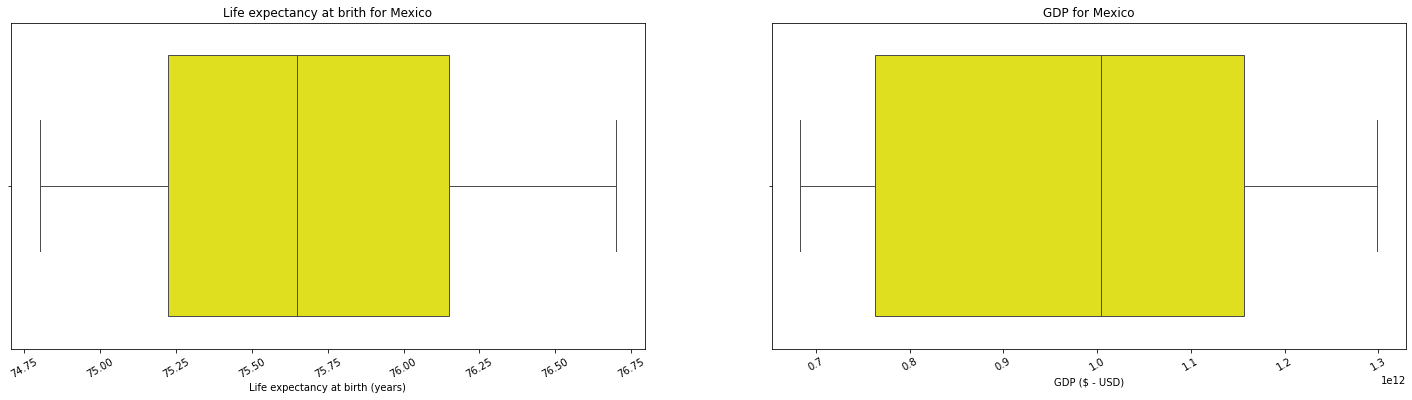

United States of America


<Figure size 432x288 with 0 Axes>

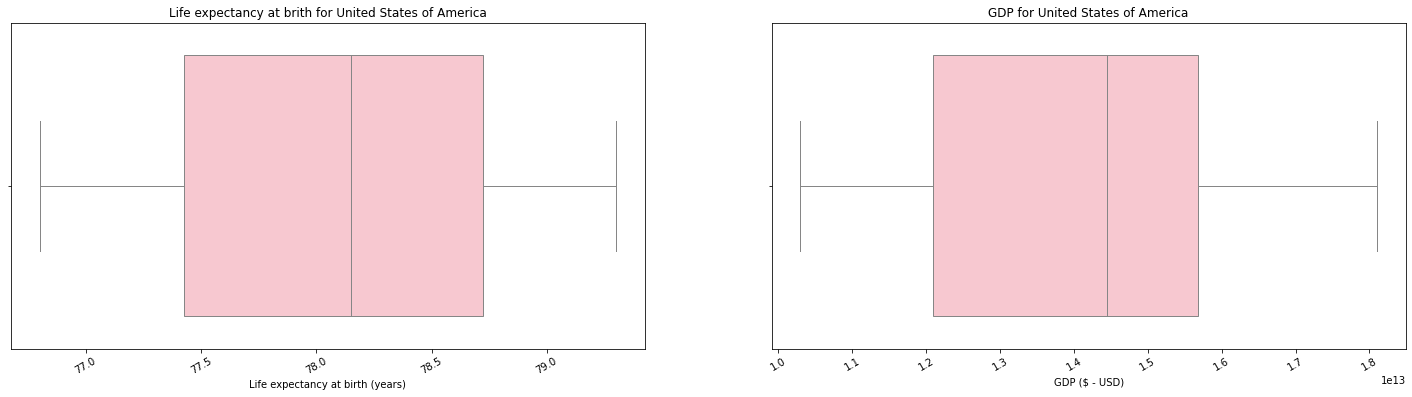

Zimbabwe


<Figure size 432x288 with 0 Axes>

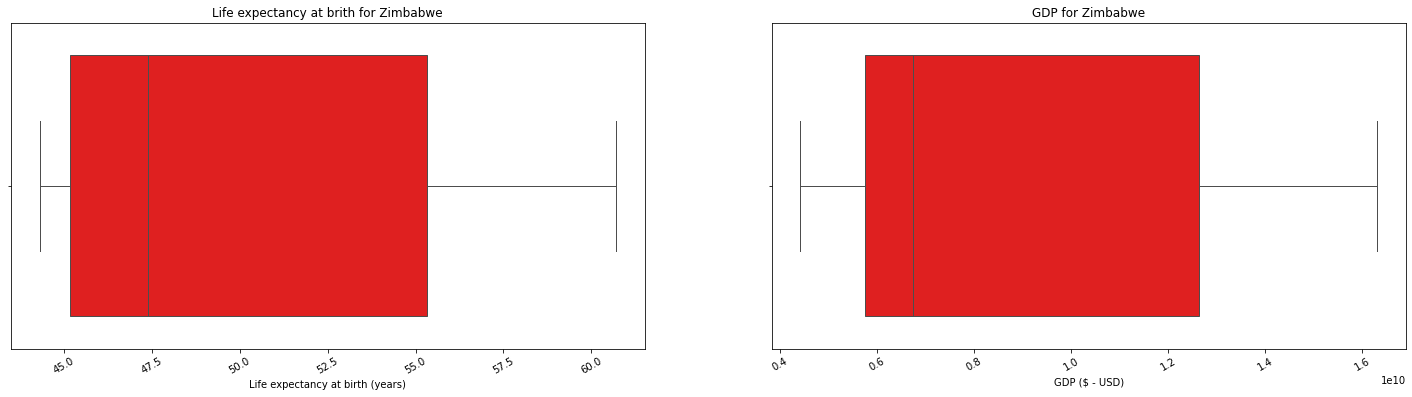

<Figure size 432x288 with 0 Axes>

In [66]:
countries = np.array(gdp_life.Country.unique())
colours = ['blue', 'orange', 'green', 'yellow', 'pink', 'red']
i = 0
for country in countries:
    print(country)
    df = gdp_life[(gdp_life.Country == country)]
    plt.figure(figsize = (25, 6))
    plt.subplot(1, 2, 1)
    sns.boxplot(x = 'Life_expectancy', data = df, color = colours[i])
    plt.xticks(rotation = 30)
    plt.title('Life expectancy at brith for ' + country)
    plt.xlabel('Life expectancy at birth (years)')
    plt.subplot(1, 2, 2)
    sns.boxplot(data = df, x = 'GDP', color = colours[i])
    plt.title('GDP for ' + country)
    plt.xlabel("GDP ($ - USD)")
    plt.xticks(rotation = 30)
    plt.show()
    plt.clf()
    i+= 1
    

From this we can see that the skew of the distributions for `GDP` and `Life expecancy` do not always match up, does this mean they're not correlated?

*It's reasonable so infer that they're not as strongly correlated as first assumed, yet this cannot full discount a correlation between the two.*

We can also see that there's relation between country's status and their relative metrics, or at least that is how it appears from these plots alone.


**Scatter plot of `GDP` vs `Life expectancy`**

To see if there's any clustering for the two above mentioned variables, I have scattered them to visualise any areas where many points fall.

These are coloured by country.

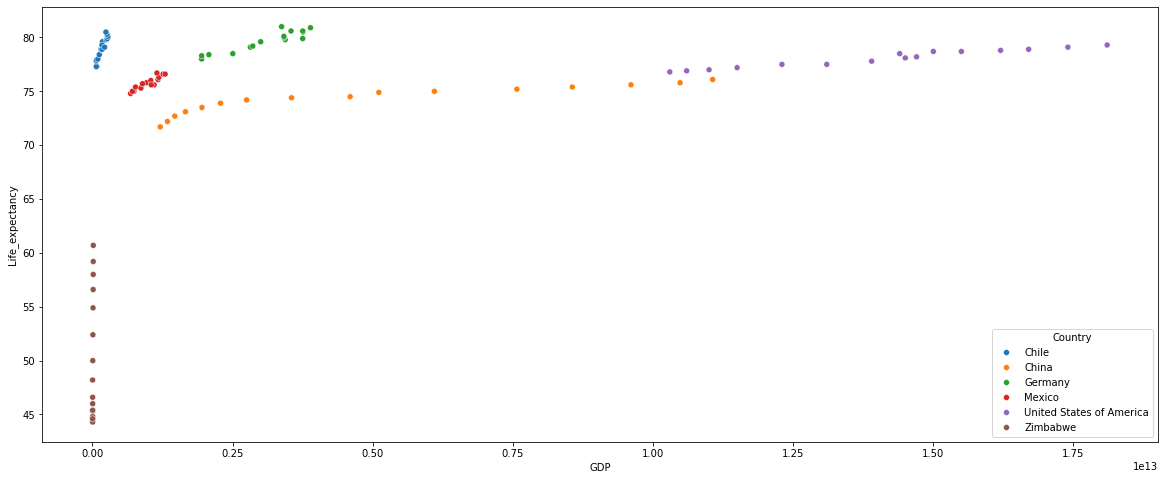

<Figure size 432x288 with 0 Axes>

In [69]:
plt.figure(figsize = (20, 8))
sns.scatterplot(x = 'GDP', y = 'Life_expectancy', data = gdp_life, hue = 'Country')
plt.show()
plt.clf()

From this we can see some countries, like `China` and `The USA` have significantly increased their GDP's with a slight increase in life expectancy. Where as other countries, have seen the opposite or little changes in either metric. 

*However*, this is not a relative scale, so **are there any relative trends?**

Below are the plots for both `GDP` and `Life expectancy` over time, by country.

**`GDP` over time:**

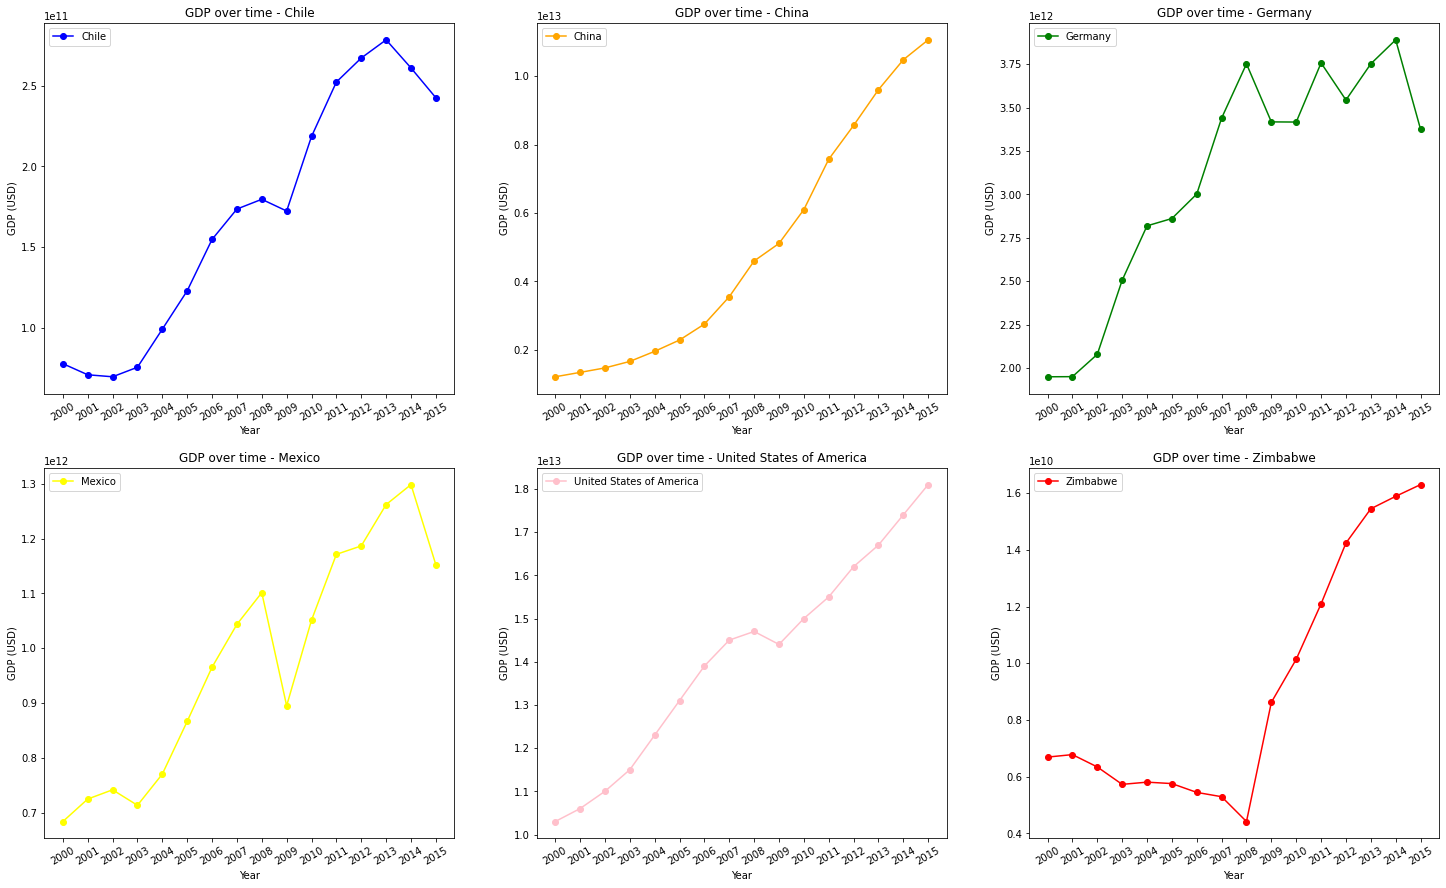

<Figure size 432x288 with 0 Axes>

In [71]:
plt.figure(figsize = (25, 15))

for i in range(1, len(countries) + 1):
    df = gdp_life[(gdp_life.Country == countries[i-1])]
    ax = plt.subplot(2, 3, i)
    x_values = range(len(df.Year.unique()))
    plt.plot(x_values, df.GDP, label = countries[i-1], color = colours[i-1], marker='o')
    plt.title('GDP over time - ' + countries[i-1])
    plt.xlabel('Year')
    ax.set_xticks(x_values)
    ax.set_xticklabels(df.Year.unique(), rotation = 30)
    plt.ylabel('GDP (USD)')
    plt.legend()
plt.show()
plt.clf()


**`Life Expectancy` over time:**

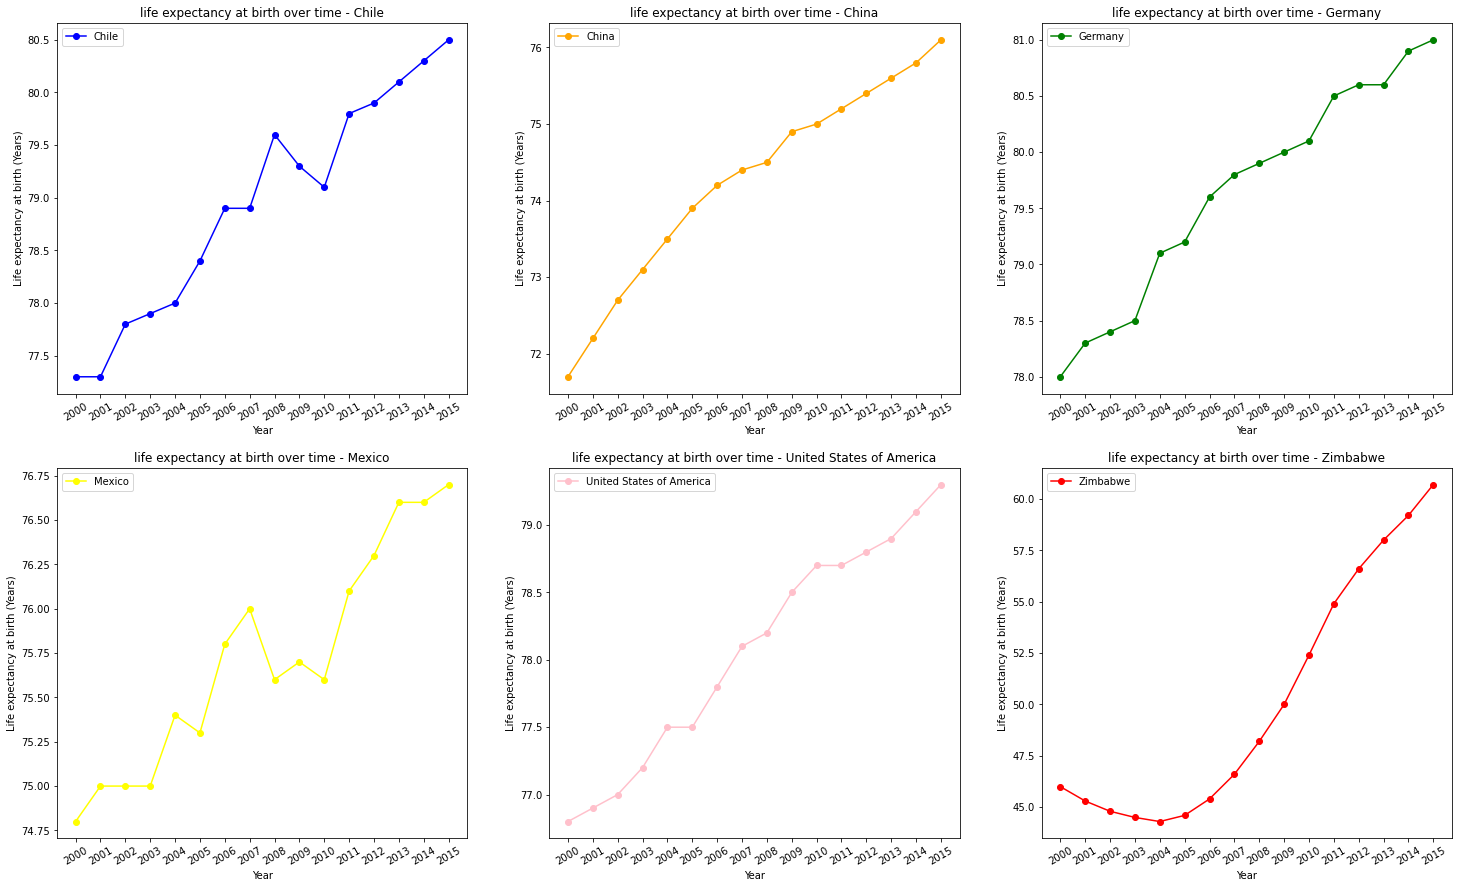

<Figure size 432x288 with 0 Axes>

In [73]:
plt.figure(figsize = (25, 15))
for i in range(1, len(countries) + 1):
    df = gdp_life[(gdp_life.Country == countries[i-1])]
    ax = plt.subplot(2, 3, i)
    x_values = range(len(df.Year.unique()))
    plt.plot(x_values, df['Life_expectancy'], label = countries[i-1], color = colours[i-1], marker='o')
    plt.title('life expectancy at birth over time - ' + countries[i-1])
    ax.set_xticks(x_values)
    ax.set_xticklabels(df.Year.unique(), rotation = 30)
    plt.xlabel('Year')
    plt.ylabel('Life expectancy at birth (Years)')
    plt.legend()
plt.show()
plt.clf()

**What can be deduced?**

From this we can see all countries have made advancements over time in both metrics, even if there are some misshaps along the way. 

We can see the effects of the 2008 financial crisis, on all but China. *Why is this?* - This, sadly, cannot be deduced soley from this dataset.

The graphs show us that the more advanced and developed countries continues to see and increase in life expectancy year on year, regardless of external circumstances. This could be due to many things such as access to health care to technological advances, *but why does this matter in this instance?*

Because it shows a clear correlation between `GDP` and `Life Expectancy`, as those countries with a higher GDP also have a much more stable life expectancy, along with the values being higher overall too.

As this is a correlation that can be infered, does it acctually appear to statisically have a correlation?

**Statistical correlations between `All Columns`:**


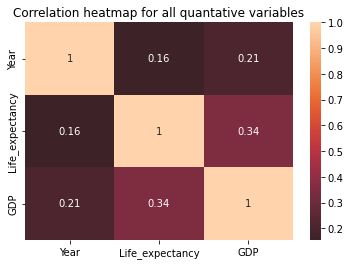

<Figure size 432x288 with 0 Axes>

In [113]:
no_country = gdp_life.drop(['Country'], axis=1)

sns.heatmap(no_country.corr(), center = 0, robust = True, annot=True)
plt.title("Correlation heatmap for all quantative variables")
plt.show()
plt.clf()

**What does this show?**

This shows that `GDP` and `Life expecantcy` are the most positively correlated, sitting at 0.34. `GDP` and `Year` also show a relatively strong correlation, of 0.21. This shows that GDP is quite responsive to changes in both time and average life expectancy.

However, `Life expectancy` and `Year` appear to show signs of a much weaker correlation of 0.16, as it ventures towards 0 and thus no correlation.

From these we can assume it's reasonable to model these via a linear regression, thus below both have been done so.

**Linear regression model for `Life Expectancy` againts `Year`:**

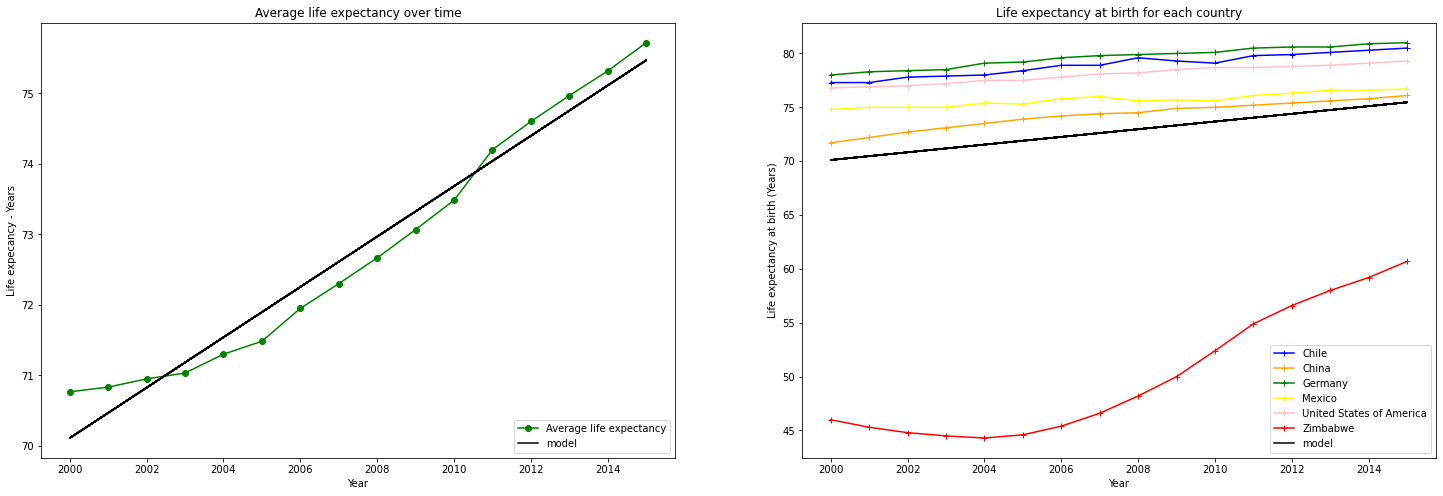

Equation of the linear regression:
life expectancy in years = (0.357108 * year) + -644.104412


<Figure size 432x288 with 0 Axes>

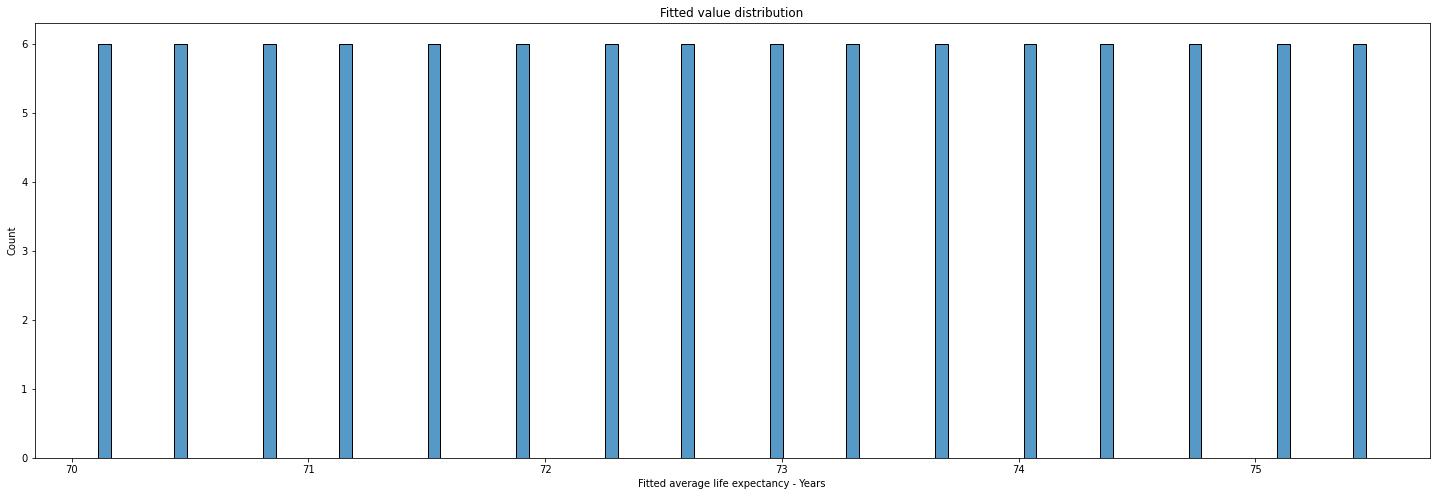

<Figure size 432x288 with 0 Axes>

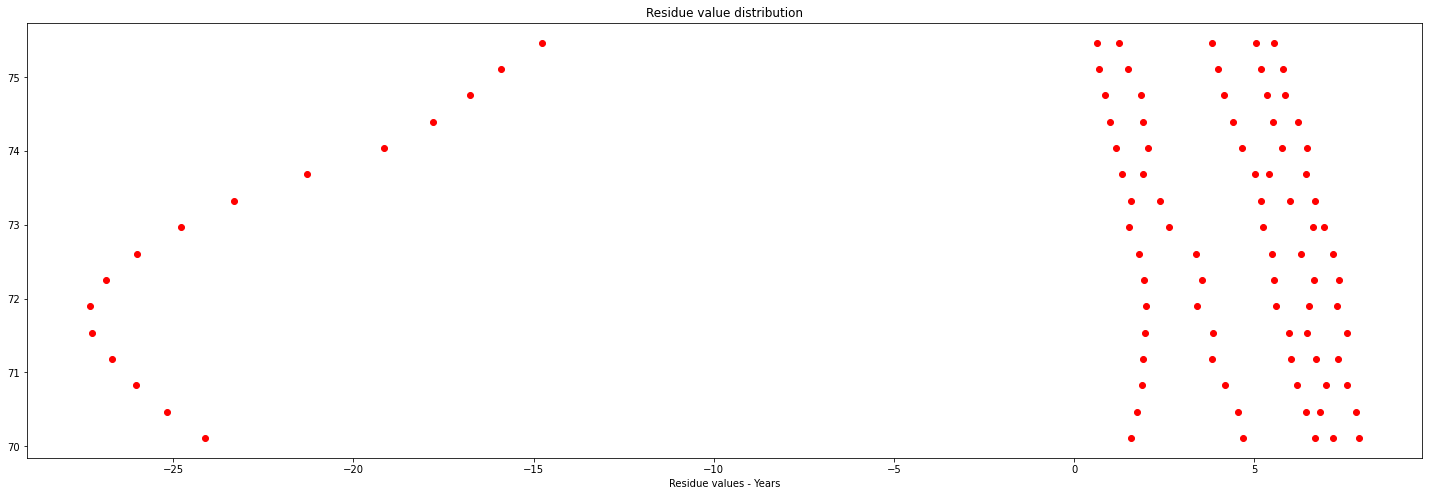

<Figure size 432x288 with 0 Axes>

In [77]:
years = np.array(gdp_life.Year.unique())
avg_life_expectancy = []

for i in range(len(years)):
    year = gdp_life[(gdp_life.Year == years[i])]
    avg_life_expectancy.append(np.mean(year['Life_expectancy']))

model_life_years = sm.OLS.from_formula('Life_expectancy ~ Year', data = gdp_life)
results_life_years = model_life_years.fit()

fitted_life_years = results_life_years.predict(gdp_life)
residue_life_years = gdp_life.Life_expectancy - fitted_life_years


plt.figure(figsize = (25, 8))
plt.subplot(1, 2, 1)
plt.plot(years, avg_life_expectancy, color='green', marker = 'o', label = 'Average life expectancy')
plt.plot(gdp_life.Year, fitted_life_years, color='black', label='model')
plt.legend(loc=4)
plt.title('Average life expectancy over time')
plt.xlabel('Year')
plt.ylabel("Life expecancy - Years")


plt.subplot(1, 2, 2)
for i in range(1, len(countries) + 1):
    df = gdp_life[(gdp_life.Country == countries[i-1])]
    plt.plot(df.Year, df['Life_expectancy'], label = countries[i-1], color = colours[i-1], marker='+')
    plt.xlabel('Year')
    plt.ylabel('Life expectancy at birth (Years)')
plt.title('Life expectancy at birth for each country')
plt.plot(gdp_life.Year, fitted_life_years, color='black', label='model')
plt.legend(loc=4)
plt.show()
plt.clf()
    

print("Equation of the linear regression:")
print('life expectancy in years = ({:.6f} * year) + {:.6f}'.format(results_life_years.params[1], results_life_years.params[0]))

plt.figure(figsize = (25, 8))
sns.histplot(fitted_life_years, bins = 100)
plt.title('Fitted value distribution')
plt.xlabel('Fitted average life expectancy - Years')
plt.show()
plt.clf()

plt.figure(figsize = (25, 8))
plt.scatter(residue_life_years, fitted_life_years, color='red')
plt.title('Residue value distribution')
plt.xlabel('Residue values - Years')
plt.show()
plt.clf()


We can see that a linear regression here is a suitable form of model to use, as there is no residue patternat all, even though the fitted values are not normally distributed. These deiscrepencies will be due to the nature of the small data set and thus lack of values for each data point.

From the graph on the right, we can see the model sits below all countries besides `Zambia`, showing the effect that this country is having on the predicted values. 

It also have a significant effect on the average values too, as these sit around the values of the model. 

We can see that these two values are **Poistively Correlated**, meaning that `Life expecancy` should increase proportionally with the years, as 1 year will add 0.357 expected years to the average global life expectancy.

*Now we know `Years` and `Life expectancy` are positivelty correlated and can be modelled, can we model `GDP` vs `Life expectancy`?*

Yes we can.

**`Life expectancy` modelled against `GDP`:**

The linear regression model for Chile is:
Life expectancy = (0.00000000001308 * GDP) + 76.7223
The linear regression model for China is:
Life expectancy = (0.00000000000034 * GDP) + 72.5669
The linear regression model for Germany is:
Life expectancy = (0.00000000000136 * GDP) + 75.4399
The linear regression model for Mexico is:
Life expectancy = (0.00000000000276 * GDP) + 73.0209
The linear regression model for United States of America is:
Life expectancy = (0.00000000000034 * GDP) + 73.3336
The linear regression model for Zimbabwe is:
Life expectancy = (0.00000000133530 * GDP) + 37.9925


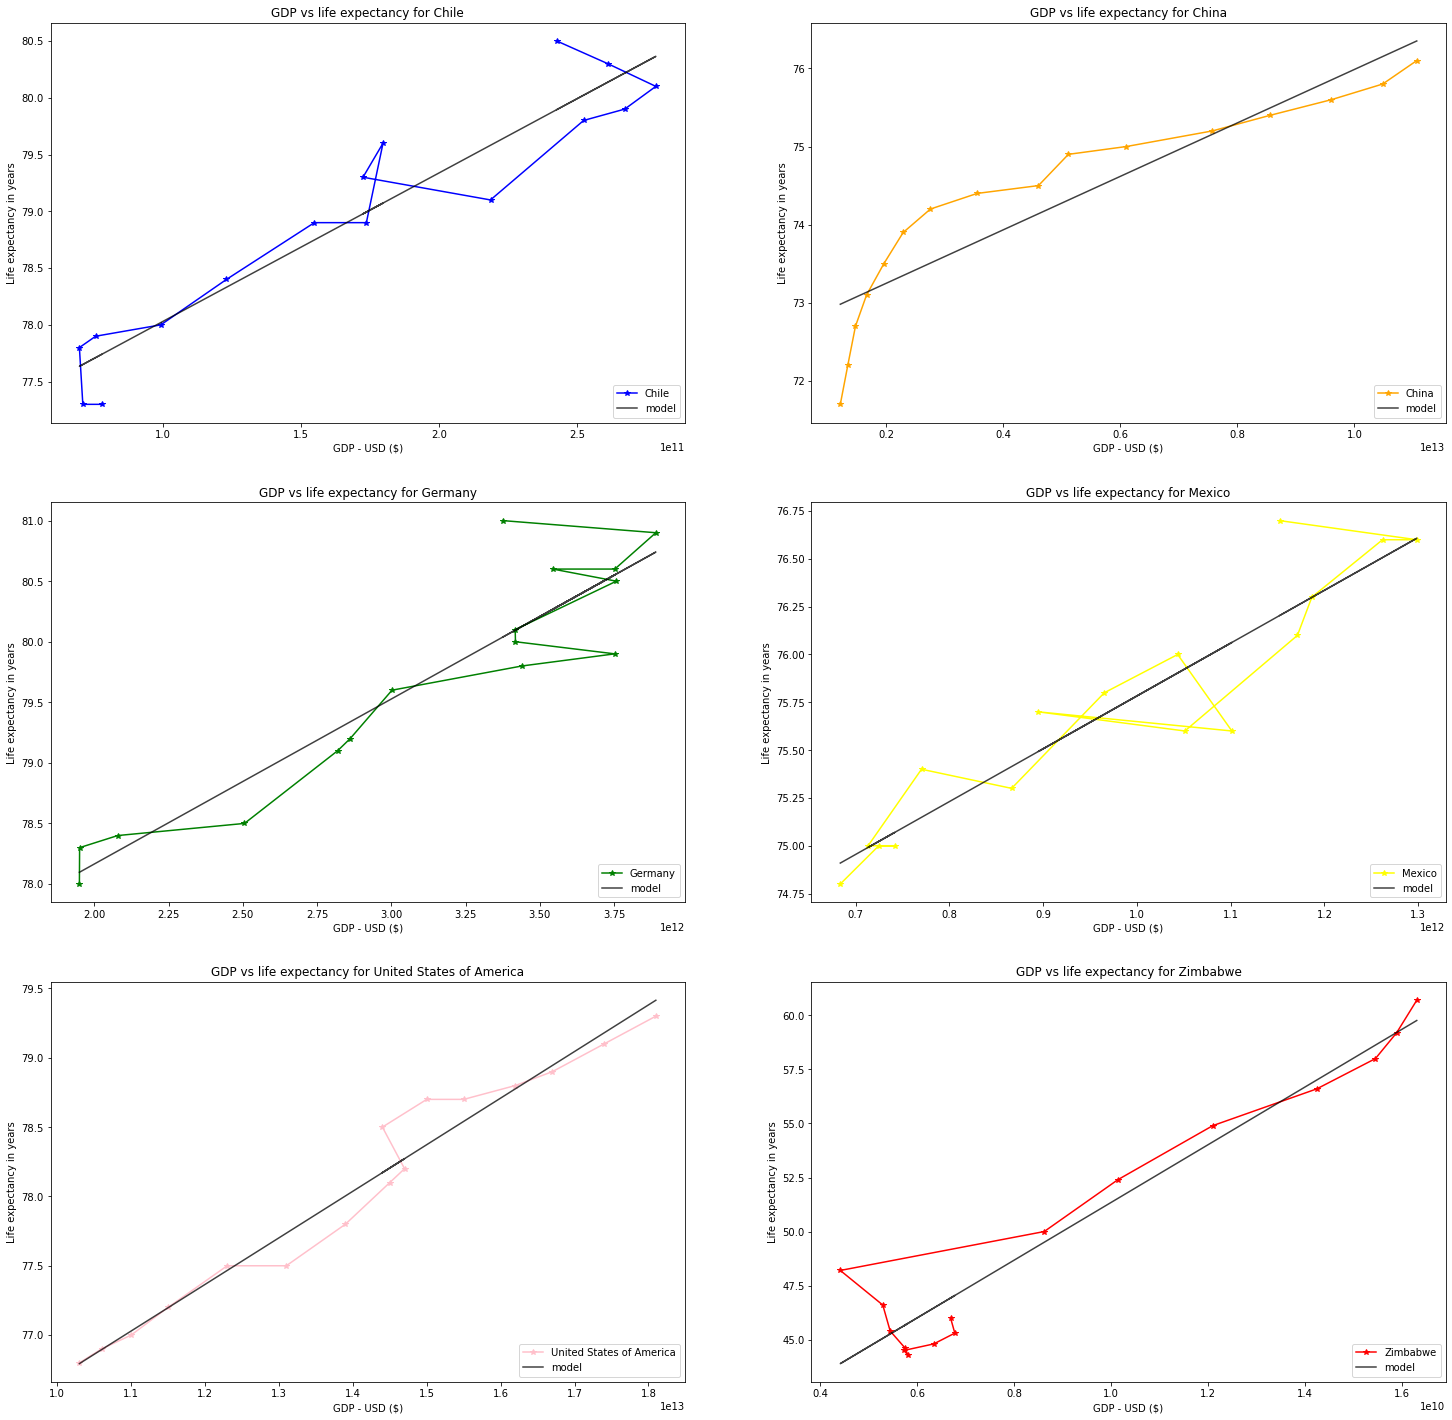

<Figure size 432x288 with 0 Axes>

In [79]:

plt.figure(figsize = (25, 25))
for i in range(1, len(countries)+1):
    df = gdp_life[(gdp_life.Country == countries[i-1])]
    plt.subplot(3, 2, i)
    plt.title("GDP vs life expectancy for " + countries[i-1])
    plt.plot(df.GDP, df.Life_expectancy, color=colours[i-1], label = countries[i-1], marker = '*')
    plt.xlabel("GDP - USD ($)")
    plt.ylabel("Life expectancy in years")
    model = sm.OLS.from_formula('Life_expectancy ~ GDP', data = df)
    results = model.fit()
    plt.plot(df.GDP, results.predict(df), color='black', label = 'model', alpha = 0.75)
    plt.legend(loc = 4)
    print("The linear regression model for " + countries[i-1] + " is:")
    print("Life expectancy = ({:.14f} * GDP) + {:.4f}".format(results.params[1], results.params[0]))


plt.show()
plt.clf()

**What can we see from this?**

From this we can see that for all `Countries` in the dataset, we can see that there is a positive correlation between the countries' `GDP` and their `Life expectancy`, which was to be somewhat expected. 

We can see the lower the value of `GDP` for a country, the greater impact an increase has on increasing the `Life expectancy`. As higher `GDP` countries need a much greater increase in `GDP` to add an additional year to their `Life expectancy`.

# Conclusions:

- `GDP` and `Life Expectancy` are positively correlated.
- `Life Expectancy` and `Year`s are alos positively correlated, with a stronger and more linear relationship than above.
- Lower `Life expectancy` countries have a much more significant impact on the Global average, as opposed to those with a higher average value.
- Due to the small nature of the dataset, regional conclusions cannot be made, but Africa is shown to be significantly lower in both metrics than the rest of the world, with South America having a lower `GDP` too.